In [1]:
from tensorflow.keras.datasets import imdb


(train_data, train_labels) , (test_data , test_labels) = imdb.load_data(num_words= 10000)

In [9]:
max([max(sequence) for sequence in train_data])

9999

In [10]:
word_index = imdb.get_word_index()

word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [11]:
reverse_word_index = dict([(value, key ) for key, value in word_index.items()])


reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [13]:
my_review = train_data[0]

In [16]:
decoded_review = " ".join([ reverse_word_index.get(seq_int - 3  , "?") for seq_int in my_review])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [17]:
import numpy as np

def vectorize_sequences(sequences,  dimension = 10000):
    results = np.zeros(( len(sequences) , dimension))
    
    for i,sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] =  1 
        
    return results

In [20]:
x_train = vectorize_sequences(train_data)
x_test  =vectorize_sequences(test_data)




In [27]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [28]:
import tensorflow as tf

keras = tf.keras

In [74]:
from keras import Sequential
from keras.layers import Dense
from keras.activations import relu,sigmoid
model =  Sequential([
    Dense(units =  16   , activation=relu),
    Dense(units= 16 , activation=relu),
    Dense(units = 1 , activation= sigmoid )
])

In [75]:
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam,RMSprop
from keras.metrics import Accuracy
model.compile(optimizer=RMSprop() , loss=BinaryCrossentropy() , metrics=Accuracy())

In [76]:
x_val = x_train[:10000 ,:]
partial_x_train = x_train[10000: , :]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [83]:
history = model.fit(partial_x_train, partial_y_train , validation_data=(x_val, y_val) , epochs = 10 , batch_size=512)

Epoch 1/10
30/30 [==============================] - 1s 34ms/step - loss: 0.2080 - accuracy: 0.0000e+00 - val_loss: 0.2837 - val_accuracy: 0.0000e+00
Epoch 2/10
30/30 [==============================] - 0s 11ms/step - loss: 0.1856 - accuracy: 0.0000e+00 - val_loss: 0.2800 - val_accuracy: 0.0000e+00
Epoch 3/10
30/30 [==============================] - 0s 11ms/step - loss: 0.1664 - accuracy: 0.0000e+00 - val_loss: 0.2877 - val_accuracy: 1.0000e-04
Epoch 4/10
30/30 [==============================] - 0s 12ms/step - loss: 0.1539 - accuracy: 0.0000e+00 - val_loss: 0.2766 - val_accuracy: 1.0000e-04
Epoch 5/10
30/30 [==============================] - 0s 11ms/step - loss: 0.1404 - accuracy: 0.0000e+00 - val_loss: 0.2798 - val_accuracy: 1.0000e-04
Epoch 6/10
30/30 [==============================] - 0s 11ms/step - loss: 0.1287 - accuracy: 0.0000e+00 - val_loss: 0.2885 - val_accuracy: 1.0000e-04
Epoch 7/10
30/30 [==============================] - 0s 11ms/step - loss: 0.1200 - accuracy: 6.6667e-05 - v

In [84]:
history_dict  = history.history


history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [85]:
print(history_dict['val_loss'])

[0.28374701738357544, 0.2799750566482544, 0.2876738905906677, 0.2766435444355011, 0.2798120081424713, 0.28851816058158875, 0.2933669090270996, 0.29465511441230774, 0.3047873377799988, 0.31228700280189514]


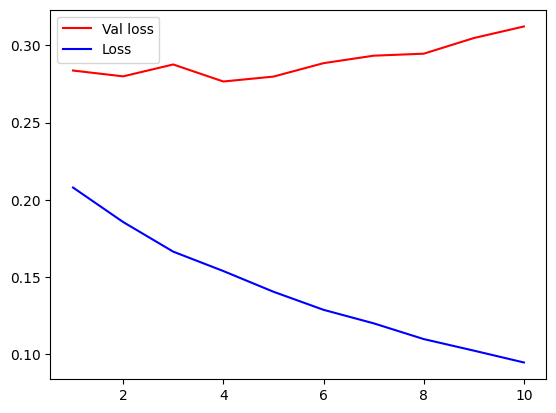

In [86]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

epochs  = range(1, len(history_dict['val_loss'])+1)
ax.plot(epochs, history_dict['val_loss'], color='r' , label='Val loss')
ax.plot(epochs , history_dict['loss' ] , color='b' , label='Loss')
plt.legend()
plt.show()

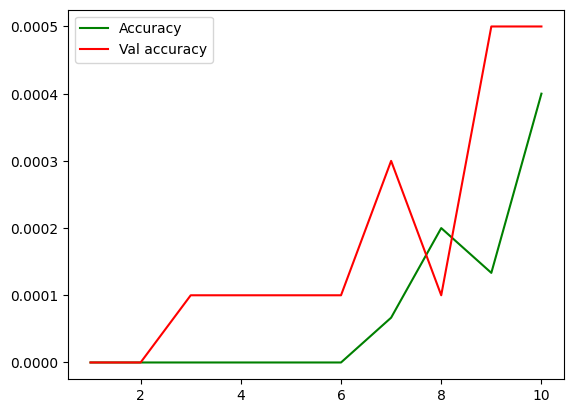

In [87]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()


ax.plot(epochs, history_dict['accuracy'] , color='green' , label='Accuracy')


ax.plot(epochs,history_dict['val_accuracy']  , color='red' , label='Val accuracy')

plt.legend()

In [88]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3352 - accuracy: 2.0000e-04


[0.33523666858673096, 0.00019999999494757503]